# Function Fitting - A Schechter function
### Ravneet Singh & Eun Ju Jong
### CIS-397
### Dr. Hallenbeck

#### Fit a Schechter function to the distribution of hydrogen masses of galaxies:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.optimize as opt
from IPython.display import Image


# Our Data and Function

![title](plotdata.png)

$$\phi(x) = \left(\ln(10)\phi^*\right) (\frac{x}{{M^*}})^{\alpha+1} (e^{-(x/M^*)})$$
<br>
- $x$ is the mass of a galaxy
<br>
<br>
- $\phi(x)$ is the number of galaxies per volume
<br>
<br>
- $\phi^*$ is a normalization factor which determines the average number of galaxies per volume
<br>
<br>
-  $\alpha$ is the slope of the faint-end
<br>
<br>
- $M^*$ is a characteristic galaxy mass, and represents the 'knee' of the curve
<br>
<br>
With $\phi^*$, $M^*$, and $\alpha$ constant we fit the function using the schecter function.

In [4]:
def schechter_func(x, phi_star, m_star, alpha):
    coef =  np.log(10)*phi_star
    x_ratio = x/10**m_star
    
    return (coef)*(x_ratio**(alpha+1))*np.exp(-x_ratio)

In [5]:
mass = []
density = []

with open('galaxyDensity.csv', newline='') as csvfile:
    povreader = csv.reader(csvfile, delimiter=',')
    for row in povreader:
        mass.append(row[0])
        density.append(row[1])

mass = np.array(mass, dtype = 'float64')
density = np.array(density, dtype = 'float64')

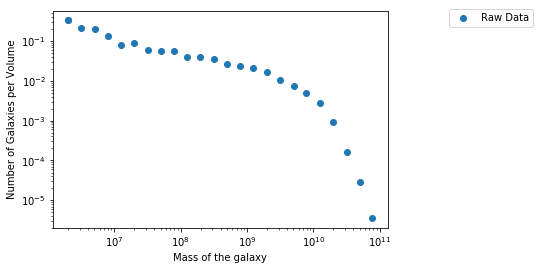

In [6]:
plt.loglog(mass, density, 'o', label = 'Raw Data')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1.03))
plt.xlabel('Mass of the galaxy')
plt.ylabel('Number of Galaxies per Volume')
plt.show()

#### Parameters and estimates on the mass and density data

In [10]:
print("Computing Schechter parameters with outliers at the ends removed")
parameters, covar_matrix = opt.curve_fit(
    schechter_func, mass[6:-1], density[6:-1], p0 = [ 0.0048, 9.96, -1.33],maxfev = 10000)

print("parameters are:")
print(parameters)
print("\nThe covariance Matrix is:")
print(covar_matrix
uncert = np.sqrt(np.diag(covar_matrix))
print("\nThe diagonal matrix is:")
print(np.diag(covar_matrix))


params = ["ϕ∗","M∗","α"]
print("\nThe uncertanties for each parameter is:")
for i in range(len(params)):
    print(params[i] + " = " + str(parameters[i]) + " +/- " + str(2 * uncert[i]))

print("95% of all intervals produced in this way will contain the true value of the parameters")

Computing Schechter parameters with outliers at the ends removed
parameters are:
[ 4.51916919e-03  1.00238177e+01 -1.32954177e+00]

The covariance Matrix is:
[[ 2.16410825e-06 -3.60448508e-04  3.64871898e-05]
 [-3.60448508e-04  6.91372539e-02 -4.77100813e-03]
 [ 3.64871898e-05 -4.77100813e-03  8.27003023e-04]]

The diagonal matrix is:
[2.16410825e-06 6.91372539e-02 8.27003023e-04]

The uncertanties for each parameter is:
ϕ∗ = 0.004519169188237178 +/- 0.0029421816728526897
M∗ = 10.023817676956417 +/- 0.525879278639654
α = -1.3295417692652927 +/- 0.05751532049058442
95% of all intervals produced in this way will contain the true value of the parameters


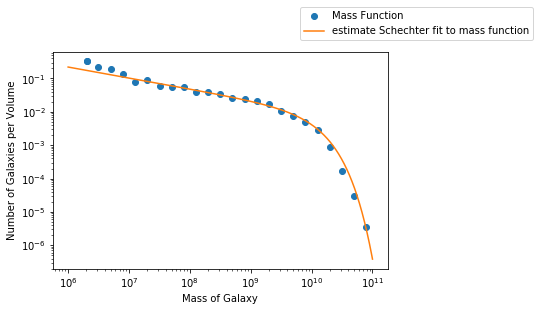

In [11]:
#sample x values
xdata = 10**np.linspace(6, 11, 10000)
# y is the function with parameters from the paper
y = schechter_func(xdata, 0.0048, 9.96, -1.33)
#ydata is the function with parameters we calculated
ydata = schechter_func(xdata, parameters[0], parameters[1], parameters[2])

plt.loglog(mass, density, 'o', label = 'Mass Function')
plt.loglog(xdata, ydata, label = 'estimate Schechter fit to mass function')
#plt.loglog(xdata, y, label = 'Schechter fit to mass function')

plt.legend(loc = 'lower right', bbox_to_anchor=(1.45, 1.03))
plt.xlabel('Mass of Galaxy')
plt.ylabel('Number of Galaxies per Volume')
plt.show()

Another variable we can use instead of Mass is Luminosity

Citation:  
https://arxiv.org/pdf/1008.5107.pdf  
https://www.astro.umd.edu/~richard/ASTRO620/LumFunction-pp.pdf  